## Rigidity persistence analysis

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random

plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

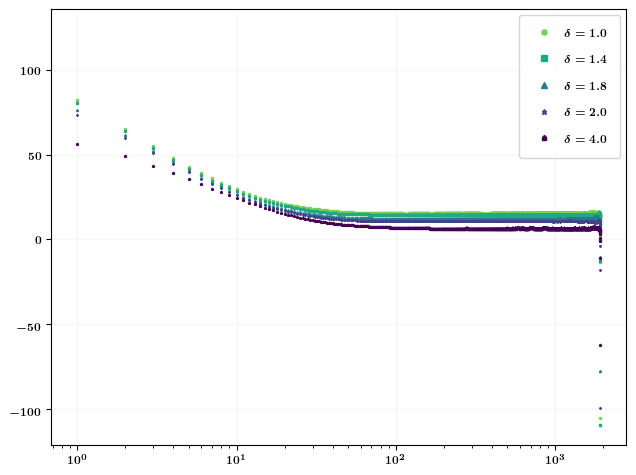

In [9]:
phi = [0.75]#, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.792]
ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r'] #color scheme
topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"

cmap         = matplotlib.colormaps['viridis_r'] 

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.8181942616808251]
off          = 100
line_markers = ['o', 's', '^', '*', 'p']


for i, phii in enumerate(phi):
    #perse_ar = []
    for j, arj in enumerate(ar):
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        workdir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5'
        pers = [] 
        if os.path.exists(workdir):
            for l in range(4):
                rigFile = f'{workdir}/run_{l+1}/rigPers.txt'
                data    = np.genfromtxt(rigFile, delimiter='', dtype=float, skip_header=1)
                pers.append(data[:,1])
            persDat = np.mean(np.array(pers), axis=0)
            #perse_ar.append(persDat)
            plt.plot(persDat, linestyle='',marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
                     color=cmap((j+1)/len(ar)),linewidth=1.2, markersize=1.5)
plt.legend(loc='best', fontsize=8, labelspacing=1.5,borderpad=1.2, markerscale=2.5)
plt.xscale('log')
plt.grid('both', alpha = .1)
#plt.ylim([.1,110])
plt.tight_layout()
if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "rigperse_1" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

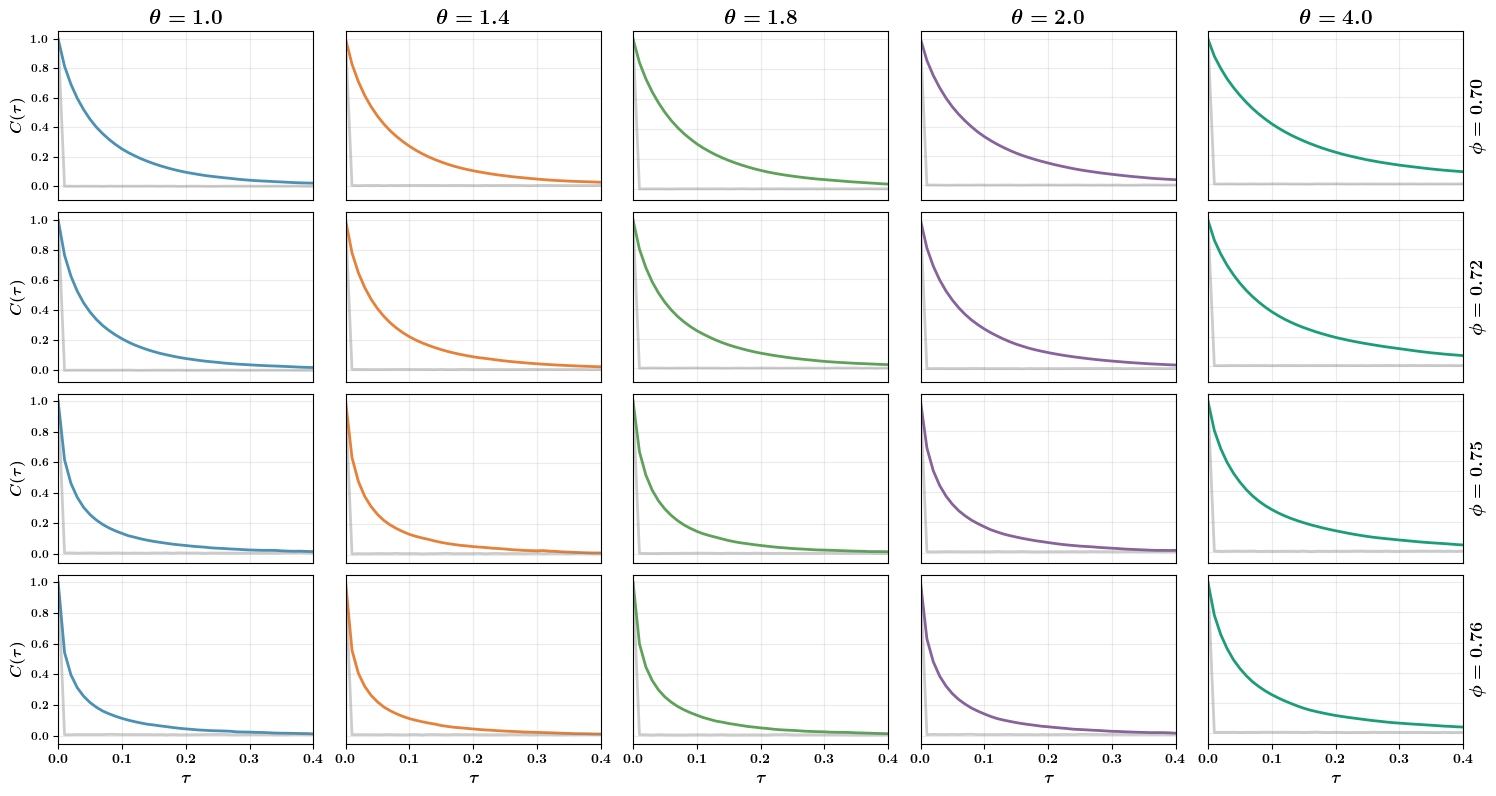

In [78]:
# rig perse 3 (with new code (rigPerse2.py))

phi = [0.70, 0.72, 0.75, 0.76]
ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r'] #color scheme
topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"

#topDir        = '/Volumes/Rahul_2TB/high_bidispersity'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/' 

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.8181942616808251]
off          = 100
numruns      = 1
line_markers = ['o', 's', '^', '*', 'p']

fig,axs = plt.subplots(len(phi), len(ar), figsize=(3*len(ar), 2*len(phi)))

for i, phii in enumerate(phi):
    for j, arj in enumerate(ar):
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        workdir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5'
        pers = []; pers1 = []
        taug = []; taug1 = []
        if os.path.exists(workdir):
            for l in range(numruns):
                rigFile     = f'{workdir}/run_{l+1}/rigPers.txt'
                rigRandFile = f'{workdir}/run_{l+1}/rigPers_random.txt'
                
                data  = np.genfromtxt(rigFile, delimiter='', dtype=float, skip_header=1)
                data1 = np.genfromtxt(rigRandFile, delimiter='', dtype=float, skip_header=1)
                
                pers.append(data[:,1])
                taug.append(data[:,0])
                
                pers1.append(data1[:,1])
                taug1.append(data1[:,0])
                
                #taug[l][0]  = 1/500
                #taug1[l][0] = 1/500
                
            persDat  = np.mean(np.array(pers), axis=0)
            taugDat  = np.mean(np.array(taug), axis=0)
            
            persDat1 = np.mean(np.array(pers1), axis=0)
            taugDat1 = np.mean(np.array(taug1), axis=0)
        else:
            persDat = np.nan
            taugDat = np.nan
            
            persDat1 = np.nan
            taugDat1 = np.nan
        
        #persDat1 = [x for x in persDat if not np.isnan(x) and x > 0]
        #taugDat1 = [y for x,y in zip(persDat,taugDat) if not np.isnan(x) and x > 0]
        axs[i,j].plot(taugDat, persDat, linestyle='-', color=colors[j],linewidth=2)
        
        if type(persDat1) != float:
            #maxtau   = np.max(persDat1)
            #persDat2 = [x/maxtau for x in persDat1]
            axs[i,j].plot(taugDat1, persDat1, linestyle='-', color='grey',linewidth=2, alpha=0.4)
        
        #axs[i,j].set_xscale('log')
        axs[i,j].set_xlim([0, 0.4])
        #axs[i,j].set_ylim([-0.04, 0.1])
        axs[i,j].grid('both', alpha = .25)
        axs[0,j].set_title(fr'$\theta = {arj}$', fontsize=15, pad=5)

        axs[i,-1].set_ylabel(fr'$\mathbf{{\phi = {phir}}}$', color="black", fontsize=13, labelpad=5)
        axs[i,-1].yaxis.set_label_position("right")
        axs[i,-1].yaxis.label.set_rotation(90)
        
        if j == 0:
            axs[i,j].set_ylabel(r'$C(\mathbf{\tau})$', fontsize=11)
            axs[i,j].tick_params(axis='y', labelsize=8)
        else:
            axs[i,j].tick_params(axis='y', which='both', left=False, labelleft=False)

        if phii == phi[-1]:
            axs[i,j].set_xlabel(r'$\tau$', fontsize=12)
            axs[i,j].tick_params(axis='x', labelsize=10)
            
        else:
            axs[i,j].tick_params(axis='x', which='both', bottom=False, labelbottom=False)


plt.tight_layout()
if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "rigperse_all5_2" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

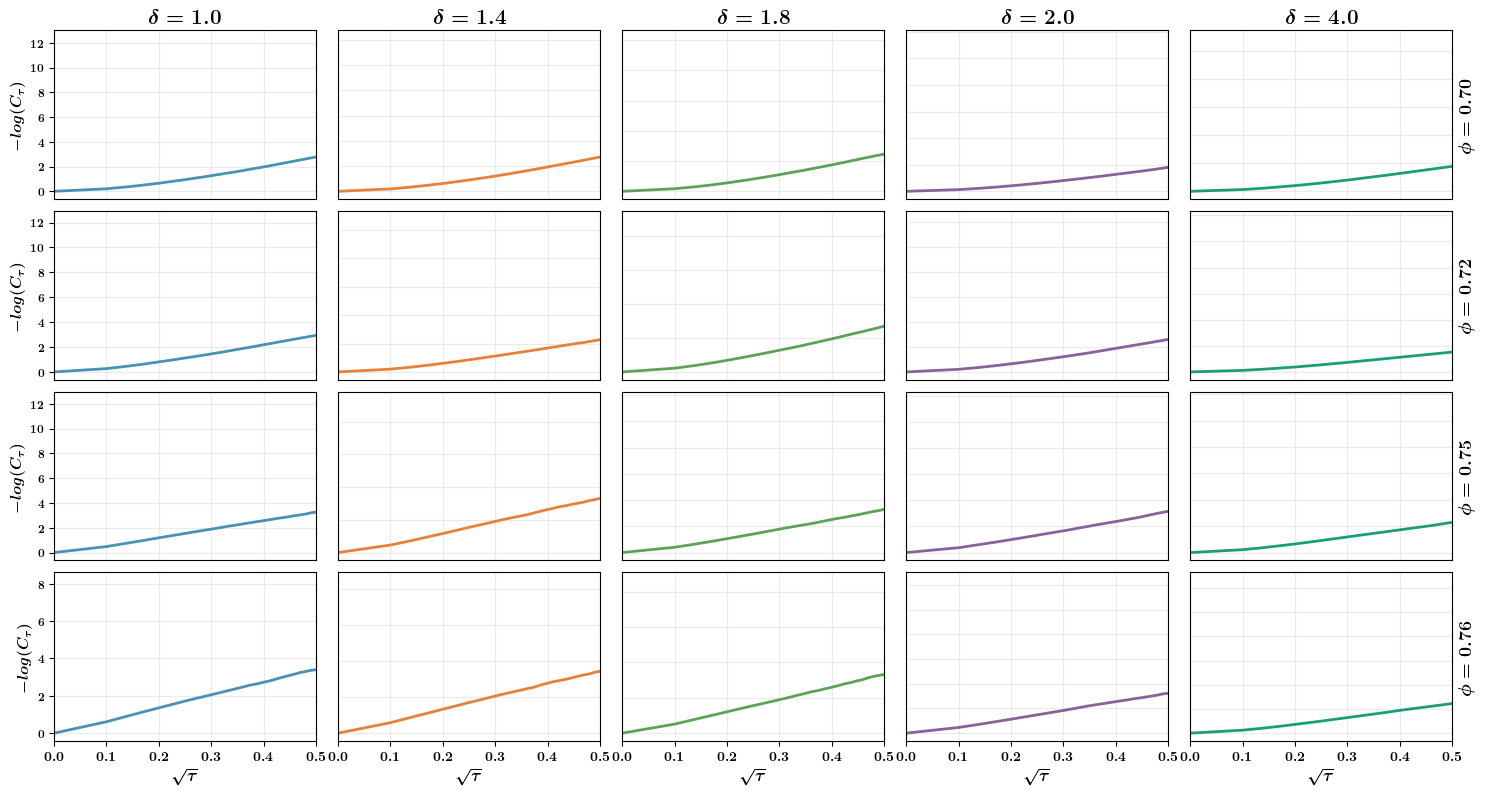

In [81]:
# rig perse 4 (with new code (rigPerse2.py))

phi = [0.70, 0.72, 0.75, 0.76]
ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r'] #color scheme
topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"

#topDir        = '/Volumes/Rahul_2TB/high_bidispersity'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/' 

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.8181942616808251]
off          = 100
numruns      = 1
line_markers = ['o', 's', '^', '*', 'p']

fig,axs = plt.subplots(len(phi), len(ar), figsize=(3*len(ar), 2*len(phi)))

for i, phii in enumerate(phi):
    for j, arj in enumerate(ar):
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        workdir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5'
        pers = []
        taug = []
        if os.path.exists(workdir):
            for l in range(numruns):
                rigFile = f'{workdir}/run_{l+1}/rigPers.txt'
                data    = np.genfromtxt(rigFile, delimiter='', dtype=float, skip_header=1)
                pers.append(data[:,1])
                taug.append(data[:,0])
            persDat  = np.mean(np.array(pers), axis=0)
            taugDat  = np.mean(np.array(taug), axis=0)
        else:
            persDat = np.nan
            taugDat = np.nan
        persDat1 = [-np.log(x) for x in persDat if not np.isnan(x) and x > 0]
        taugDat1 = [y**.5 for x,y in zip(persDat,taugDat) if not np.isnan(x) and x > 0]
        axs[i,j].plot(taugDat1, persDat1, linestyle='-', color=colors[j],linewidth=2)

        #axs[i,j].set_xscale('log')
        axs[i,j].set_xlim([0, 0.5])
        #axs[i,j].set_ylim([-0.04, 0.1])
        axs[i,j].grid('both', alpha = .25)
        axs[0,j].set_title(fr'$\delta = {arj}$', fontsize=15, pad=5)

        axs[i,-1].set_ylabel(fr'$\mathbf{{\phi = {phir}}}$', color="black", fontsize=13, labelpad=5)
        axs[i,-1].yaxis.set_label_position("right")
        axs[i,-1].yaxis.label.set_rotation(90)
        
        if j == 0:
            axs[i,j].set_ylabel(r'$-log(C_{\tau})$', fontsize=11)
            axs[i,j].tick_params(axis='y', labelsize=8)
        else:
            axs[i,j].tick_params(axis='y', which='both', left=False, labelleft=False)

        if phii == phi[-1]:
            axs[i,j].set_xlabel(r'$\sqrt{\tau}$', fontsize=12)
            axs[i,j].tick_params(axis='x', labelsize=10)
        else:
            axs[i,j].tick_params(axis='x', which='both', bottom=False, labelbottom=False)


plt.tight_layout()
if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "rigperse_all5_logc_rrtau" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

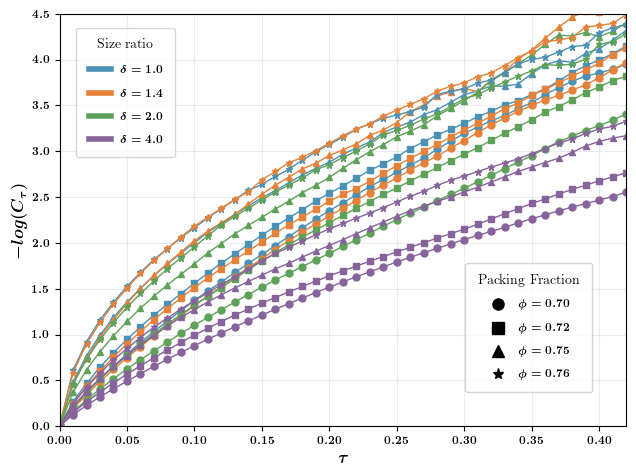

In [82]:
# rig perse 4 
from matplotlib.lines import Line2D
from scipy import stats

phi = [0.70, 0.72, 0.75, 0.76]
ar  = [1.0, 1.4, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r'] #color scheme
topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"

#topDir        = '/Volumes/Rahul_2TB/high_bidispersity'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/' 

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.8181942616808251]
off          = 100
numruns      = 1
line_markers = ['o', 's', '^', '*', 'p']

#fig,axs = plt.subplots(len(phi), len(ar), figsize=(3*len(ar), 2*len(phi)))

for i, phii in enumerate(phi):
    for j, arj in enumerate(ar):
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        workdir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5'
        pers = []; 
        taug = []; 
        if os.path.exists(workdir):
            for l in range(numruns):
                rigFile     = f'{workdir}/run_{l+1}/rigPers.txt'
                rigRandFile = f'{workdir}/run_{l+1}/rigPers_random.txt'
                
                data  = np.genfromtxt(rigFile, delimiter='', dtype=float, skip_header=1)
                pers.append(data[:,1])
                taug.append(data[:,0])
                
            persDat  = np.mean(np.array(pers), axis=0)
            taugDat  = np.mean(np.array(taug), axis=0)
        else:
            persDat = np.nan
            taugDat = np.nan
            
        persDat1 = [-np.log(x) for x in persDat if not np.isnan(x) and x > 0]
        taugDat1 = [y for x,y in zip(persDat,taugDat) if not np.isnan(x) and x > 0]
        plt.plot(taugDat1, persDat1, linestyle='-', color=colors[j], marker=line_markers[i], markersize=5, linewidth=1)

plt.xlim([0, 0.42])
plt.ylim([0, 4.5])
plt.ylabel(r"$-log(C_{\tau})$", fontsize=12)
plt.xlabel(r'$\tau$', fontsize=12)
plt.grid(visible=True, which='both', alpha=0.25)
#plt.title("Rigidity Persistence", fontsize=15)
plt.tight_layout()

color_legend  = [Line2D([0], [0], color=colors[j], lw=4, label=fr'$\delta = {ar[j]:.1f}$') for j in range(len(ar))]
marker_legend = [Line2D([0], [0], marker=line_markers[i], color='black', linestyle='None', markersize=8, label=fr'$\phi = {phi[i]:.2f}$') for i in range(len(phi))]

color_legend_obj = plt.legend(handles=color_legend, title="Size ratio", loc="upper left", bbox_to_anchor=(0.02, 0.98), labelspacing=1.2, borderpad=1.1, title_fontsize=10)
plt.gca().add_artist(color_legend_obj)

plt.legend(handles=marker_legend, title="Packing Fraction", bbox_to_anchor=(0.95, 0.41), labelspacing=1.2, borderpad=1.1, title_fontsize=10)

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "rigperse_logc_tau" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

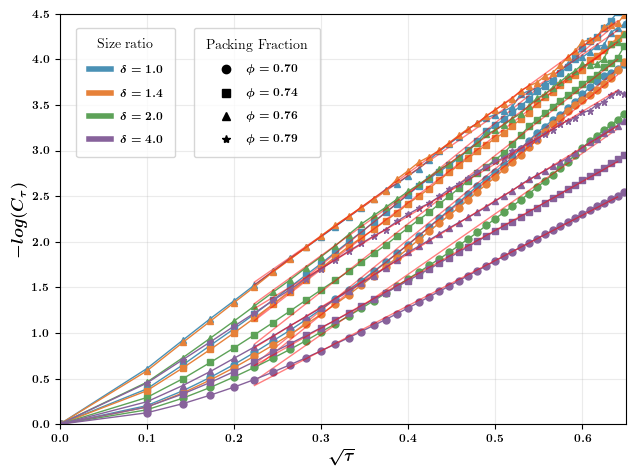

In [104]:
# rig perse 4 (with new code (rigPerse2.py))

from matplotlib.lines import Line2D
from scipy import stats

phi = [0.70, 0.74, 0.76, 0.79]
ar  = [1.0, 1.4, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r']

topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"

#topDir        = '/Volumes/Rahul_2TB/high_bidispersity'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/' 

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.8181942616808251]
off          = 100
numruns      = 1
line_markers = ['o', 's', '^', '*', 'p', 'D', 'v', 'x']


for i, phii in enumerate(phi):
    for j, arj in enumerate(ar):
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        workdir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5'
        pers = []; 
        taug = []; 
        if os.path.exists(workdir):
            for l in range(numruns):
                rigFile     = f'{workdir}/run_{l+1}/rigPers.txt'
                rigRandFile = f'{workdir}/run_{l+1}/rigPers_random.txt'
                
                data  = np.genfromtxt(rigFile, delimiter='', dtype=float, skip_header=1)
                pers.append(data[:,1])
                taug.append(data[:,0])
                
            persDat  = np.mean(np.array(pers), axis=0)
            taugDat  = np.mean(np.array(taug), axis=0)
            persDat1 = [-np.log(x) for x in persDat if x > 0]
            taugDat1 = [y**0.5 for x,y in zip(persDat,taugDat) if x > 0]
            plt.plot(taugDat1, persDat1, linestyle='-', color=colors[j], marker=line_markers[i], markersize=5, linewidth=1)

            #slope, residuals, _, _, _ = np.polyfit(np.array(taugDat1), np.array(persDat1), 1, full=True)
            max_index = np.max(np.where(np.array(taugDat1) <= 0.65))
            taugDat_fit = np.array(taugDat1[:max_index])

            #m, = np.linalg.lstsq(taugDat_fit.reshape(-1,1), persDat1[:max_index], rcond=None)[0]
            #b=0
            m,b = np.polyfit(taugDat_fit[5:], persDat1[5:max_index], 1)
            plt.plot(taugDat_fit[5:], m * taugDat_fit[5:] + b, linestyle='-', color='red', alpha=.5)
        
plt.xlim([0, 0.65])
plt.ylim([0, 4.5])
plt.ylabel(r"$-log(C_{\tau})$", fontsize=12)
plt.xlabel(r'$\sqrt{\tau}$', fontsize=12)
plt.grid(visible=True, which='both', alpha=0.25)
#plt.title("Rigidity Persistence", fontsize=15)
plt.tight_layout()

color_legend  = [Line2D([0], [0], color=colors[j], lw=4, label=fr'$\delta = {ar[j]:.1f}$') for j in range(len(ar))]
marker_legend = [Line2D([0], [0], marker=line_markers[i], color='black', linestyle='None', markersize=6, label=fr'$\phi = {phi[i]:.2f}$') for i in range(len(phi))]

color_legend_obj = plt.legend(handles=color_legend, title="Size ratio", loc="upper left", bbox_to_anchor=(0.02, 0.98), labelspacing=1.2, borderpad=1.1, title_fontsize=10)
plt.gca().add_artist(color_legend_obj)

plt.legend(handles=marker_legend, title="Packing Fraction", bbox_to_anchor=(.47, 0.98), labelspacing=1.2, borderpad=1.1, title_fontsize=10)

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "rigperse_logc_rttau" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

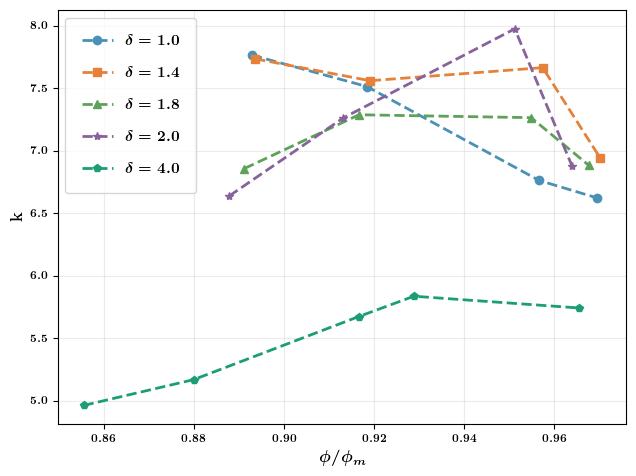

In [103]:
# rig perse 4 (with new code (rigPerse2.py))
from matplotlib.lines import Line2D
from scipy import stats

phi = [0.70, 0.72, 0.75, 0.76, 0.79]
ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r'] #color scheme
topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"

#topDir        = '/Volumes/Rahul_2TB/high_bidispersity'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/' 

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.8181942616808251]
off          = 100
numruns      = 1
line_markers = ['o', 's', '^', '*', 'p']

#fig,axs = plt.subplots(len(phi), len(ar), figsize=(3*len(ar), 2*len(phi)))

for j, arj in enumerate(ar):
    phi_list=[]
    slope_list = []
    for i, phii in enumerate(phi):
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        workdir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5'
        pers = []; 
        taug = []; 
        if os.path.exists(workdir):
            for l in range(numruns):
                rigFile     = f'{workdir}/run_{l+1}/rigPers.txt'
                rigRandFile = f'{workdir}/run_{l+1}/rigPers_random.txt'
                
                data  = np.genfromtxt(rigFile, delimiter='', dtype=float, skip_header=1)
                pers.append(data[:,1])
                taug.append(data[:,0])
                
            persDat  = np.mean(np.array(pers), axis=0)
            taugDat  = np.mean(np.array(taug), axis=0)
            
            persDat1 = [-np.log(x) for x in persDat if x > 0]
            taugDat1 = [y**0.5 for x,y in zip(persDat,taugDat) if x > 0]

            max_index  = np.max(np.where(np.array(taugDat1) <= 0.65))
            taugDat_fit = np.array(taugDat1[:max_index])

            m,b = np.polyfit(taugDat_fit[5:], persDat1[5:max_index], 1)
            slope_list.append(m)
            phi_list.append(phii/phim[j])
            #phi_list.append(phii)
            
    plt.plot(phi_list, slope_list, linestyle='--', marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
             color=colors[j], linewidth=2, markersize=6)
        
        
plt.ylabel(r"\textbf{k}", fontsize=12)
plt.xlabel(r"$\phi/\phi_{m}$", fontsize=12)
#plt.xlabel(r"$\phi$", fontsize=12)
plt.grid(visible=True, which='both', alpha=0.25)
#plt.title("Rigidity Persistence", fontsize=15)
plt.tight_layout()
plt.legend(labelspacing=1.2, borderpad=1.1, fontsize=11)

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "rigperse_slopes" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

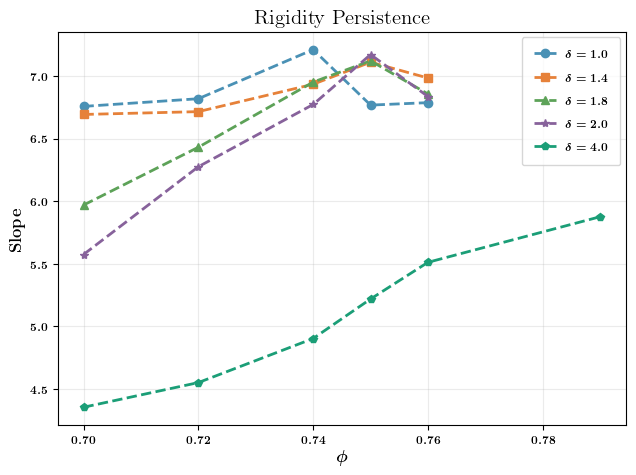

In [227]:
# rig perse 4 (with new code (rigPerse2.py))
from matplotlib.lines import Line2D
from scipy import stats

phi = [0.70, 0.72, 0.74, 0.75, 0.76, 0.79]
ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r'] #color scheme
#topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"

topDir        = '/Volumes/Rahul_2TB/high_bidispersity'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/' 

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.8181942616808251]
off          = 100
numruns      = 1
line_markers = ['o', 's', '^', '*', 'p']

#fig,axs = plt.subplots(len(phi), len(ar), figsize=(3*len(ar), 2*len(phi)))

for j, arj in enumerate(ar):
    phi_list=[]
    slope_list = []
    for i, phii in enumerate(phi):
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        workdir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5'
        pers = []; 
        taug = []; 
        if os.path.exists(workdir):
            for l in range(numruns):
                rigFile     = f'{workdir}/run_{l+1}/rigPers.txt'
                rigRandFile = f'{workdir}/run_{l+1}/rigPers_random.txt'
                
                data  = np.genfromtxt(rigFile, delimiter='', dtype=float, skip_header=1)
                pers.append(data[:,1])
                taug.append(data[:,0])
                
            persDat  = np.mean(np.array(pers), axis=0)
            taugDat  = np.mean(np.array(taug), axis=0)
            
            persDat1 = [-np.log(x) for x in persDat if x > 0]
            taugDat1 = [y**0.5 for x,y in zip(persDat,taugDat) if x > 0]

            max_index  = np.max(np.where(np.array(taugDat1) <= 0.6))
            taugDat_fit = np.array(taugDat1[:max_index])

            m,b = np.polyfit(taugDat_fit, persDat1[:max_index], 1)
            slope_list.append(m)
            #phi_list.append(phii/phim[j])
            phi_list.append(phii)
            
    plt.plot(phi_list, slope_list, linestyle='--', marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
             color=colors[j], linewidth=2, markersize=6)
        
        
plt.ylabel(r"\textbf{Slope}", fontsize=12)
#plt.xlabel(r"$\phi/\phi_{m}$", fontsize=12)
plt.xlabel(r"$\phi$", fontsize=12)
plt.grid(visible=True, which='both', alpha=0.25)
plt.title("Rigidity Persistence", fontsize=15)
plt.tight_layout()
plt.legend(labelspacing=1.2, borderpad=1.1)

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "rigperse_all5" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

In [198]:
phii/phim[1]

0.9574661056134878

In [190]:
len(slope_list)

7

### NEW DATA

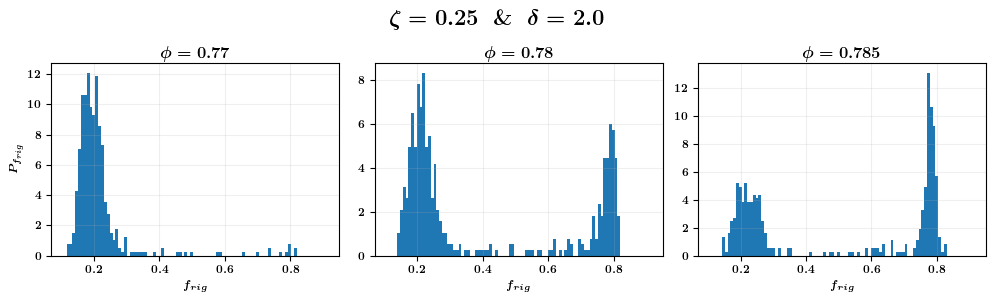

In [95]:
# Frig histogram

npp = 1000
phi = [0.77, 0.78, 0.785]
#phi = [0.75, 0.76, 0.77]
#phi = [0.77, 0.78, 0.785]
vr  = '0.25'
ar  = '2.0'
numRuns  = 1
off      = 50

#topDir        = '/Users/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

fig,axs = plt.subplots(nrows=1, ncols=len(phi), figsize=(10, 3))

for k, phii in enumerate(phi):
    frigList = []
    for run in range(numRuns):
        workDir = f"{topDir}NP_{npp}/phi_{phii}/ar_{ar}/Vr_{vr}/run_{run+1}/"
        if os.path.exists(workDir+"F_rig.txt"):
            dataFile = workDir+"F_rig.txt"
            data     = np.loadtxt(dataFile)
            frigList.append(data[off:])
            
    if len(frigList) > 0:
        frig = [item/npp for sublist in frigList for item in sublist]
        counts, bin_edges = np.histogram(frig, bins=80, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        axs[k].grid(which = 'Both', alpha = 0.2)
        axs[k].set_xlim([0.07,.95])
        axs[k].bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0])
        axs[k].set_title(fr'$\phi = {phii}$', fontsize=12, pad=3)
        axs[k].set_xlabel(r'$f_{rig}$')

axs[0].set_ylabel(r'$P_{f_{rig}}$')     
fig.suptitle(fr'$\zeta = {vr} \;\; \& \;\; \delta = {ar}$', fontsize = 16)
fig.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path + "rig_criticality_" + vr + "_" + ar + figFormat, bbox_inches="tight",dpi=500)
plt.show()

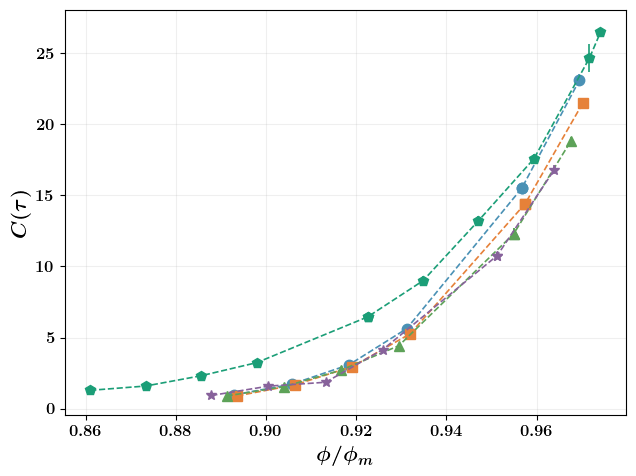

In [59]:
## Ctau correlation

phi = [0.70, 0.71, 0.72, 0.73, 0.75, 0.75, 0.76, 0.77, 0.78, 0.79, 0.792]
ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r'] #color scheme
topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"

cmap          = matplotlib.colormaps['viridis_r'] 

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.813]
cut          = 50
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']

for j, arj in enumerate(ar):
    perse_ar = []
    perse_err = []
    for i, phii in enumerate(phi):
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        workdir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5'
        pers = [] 
        if os.path.exists(workdir):
            for l in range(4):
                rigFile = f'{workdir}/run_{l+1}/rigPers.txt'
                data    = np.genfromtxt(rigFile, delimiter='', dtype=float, skip_header=1)
                pers.append(data[:,1])
            persDat = np.mean(np.array(pers), axis=0)
            perse_ar.append(np.mean(persDat[cut:-10])) #50:-50
            perse_err.append(np.std(persDat[cut:-10]))
        else:
            perse_ar.append(np.nan)
            perse_err.append(np.nan)
    phi_red = [a/phim[j] for a in phi] 
    #plt.plot(phi_red, perse_ar, linestyle='--',marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
             #color=cmap((j+1)/len(ar)),linewidth=1.2, markersize=5.5)
    plt.errorbar(phi_red, perse_ar, yerr=perse_err, linestyle='--',marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
             color=colors[j],linewidth=1.2, markersize=7.5)
#plt.yscale('log')
#plt.xscale('log')
plt.grid('both', alpha = .2)
#plt.ylim([.1,110])
plt.ylabel(r'$C(\tau)$',fontsize=15)
plt.xlabel(r'$\phi/\phi_{m}$',fontsize=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+'rigperse_2'+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [97]:
phi = [0.75, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.792]
phi_red = [a/phim[0] for a in phi] 

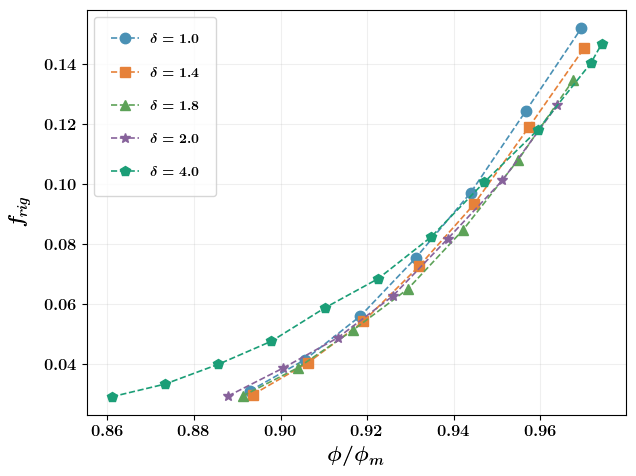

In [57]:
# F_rg data (rigid clusters)

# plotting functions

topDir = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"
#fig_save_path = "/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/SOR_meeting/figures/"

frigFile = 'F_rig.txt'
znetFile = 'Z_Znet.txt'

phi  = [0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.792]
ar   = [1.0, 1.4, 1.8, 2.0, 4.0]
phim = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.813]
npp = 1000
y   = 3 #viscosity
off = 100

plt.clf()

phi_vals       = phi
arr            = ar
line_markers = ['o', 's', '^', '*', 'p']
#cmap = matplotlib.colormaps['viridis_r'] #color scheme
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

for j, arj in enumerate(arr):
    params = []
    params_err = []
    phim_vals      = [i/phim[j] for i in phi]
    for i, phii in enumerate(phi_vals):
        dat    = []
        daterr = []
        phir   = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        for l in range(4):
            workDir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5/run_{l+1}'
            if not os.path.exists(workDir):
                continue
            file_name = f'{workDir}/{frigFile}'
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file) 
                data = data_array[off:]
                dat.append(np.mean(data))
                daterr.append(np.std(data))
        params.append(np.mean(dat)/npp if len(dat) > 0 else np.nan)
        params_err.append(np.mean(daterr)/npp if len(dat) > 0 else np.nan)

    #plt.errorbar(phim_vals, params, yerr=params_err, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)
    plt.plot(phim_vals, params, linestyle='--', marker=line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
             color=colors[j], linewidth=1.2, markersize=7.5)
        
plt.grid(which='Both', alpha=0.2)

#plt.title(labels[1][y], fontsize=18)
plt.xlabel(r'$\phi/\phi_{m}$', fontsize=15)
plt.ylabel(r'$\mathit{f}_{\mathit{rig}}$', fontsize=15, labelpad=10)

#plt.xlim(.88,.979)
#plt.ylim(0,2200)

#plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='upper left', fontsize=10, labelspacing=1.5,borderpad=1.2, markerscale = 1)

plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+'rigid_clusters'+'_vs_phim_'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [7]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random

def rigList(rigFile):
    hashCounter = -4
    clusterIDs  = []
    temp = []
    for line in rigFile:
        if line[0] == '#':
            hashCounter += 1
            if len(temp) > 0:
                clusterIDs.append(temp)
                temp = []
        elif hashCounter >= 0:
            temp.append(line.strip())
            
    rigClusterIDsList = []
    for ii, sampleList in enumerate(clusterIDs):
        tempList = []
        for kk in range(len(sampleList)):
            tempList.append([int(indx) for indx in sampleList[kk].split(',')])
        rigClusterIDsList.append(tempList)
    return rigClusterIDsList

npp=1000
off=100
rigFile = open(glob.glob(f'/media/rahul/Rahul_2TB/high_bidispersity/NP_1000/phi_0.73/ar_1.0/Vr_0.5/run_1/rig_*.dat')[0])
rigClusterIDs = rigList(rigFile)
#numSamples = len(rigClusterIDs[off:])

# To flatten list for each snapshot
clusterIDs = [[np.nan] if len(samplelist[0]) < 2 else list({int(num) for sublist in samplelist for num in sublist}) for samplelist in rigClusterIDs]

rigMatrix = np.zeros((len(clusterIDs),npp), dtype=bool)

for ii,samplelist in enumerate(clusterIDs):
    if not np.isnan(samplelist)[0]:
        rigMatrix[ii][samplelist] = True

t_tot = len(clusterIDs[off:])

ctau = []
for tau in range(len(clusterIDs)-off):
    temp=[]
    uncorr = (1/(t_tot-tau)/npp) * np.sum(rigMatrix[:][off:t_tot-tau])
    corr = 0
    for t in range(len(clusterIDs)-tau-off):
        corr += np.sum((rigMatrix[:][off+t] * rigMatrix[:][off+t+tau]))
    corr /= (1/(t_tot-tau)/npp)
    ctau.append(corr - uncorr**2.)

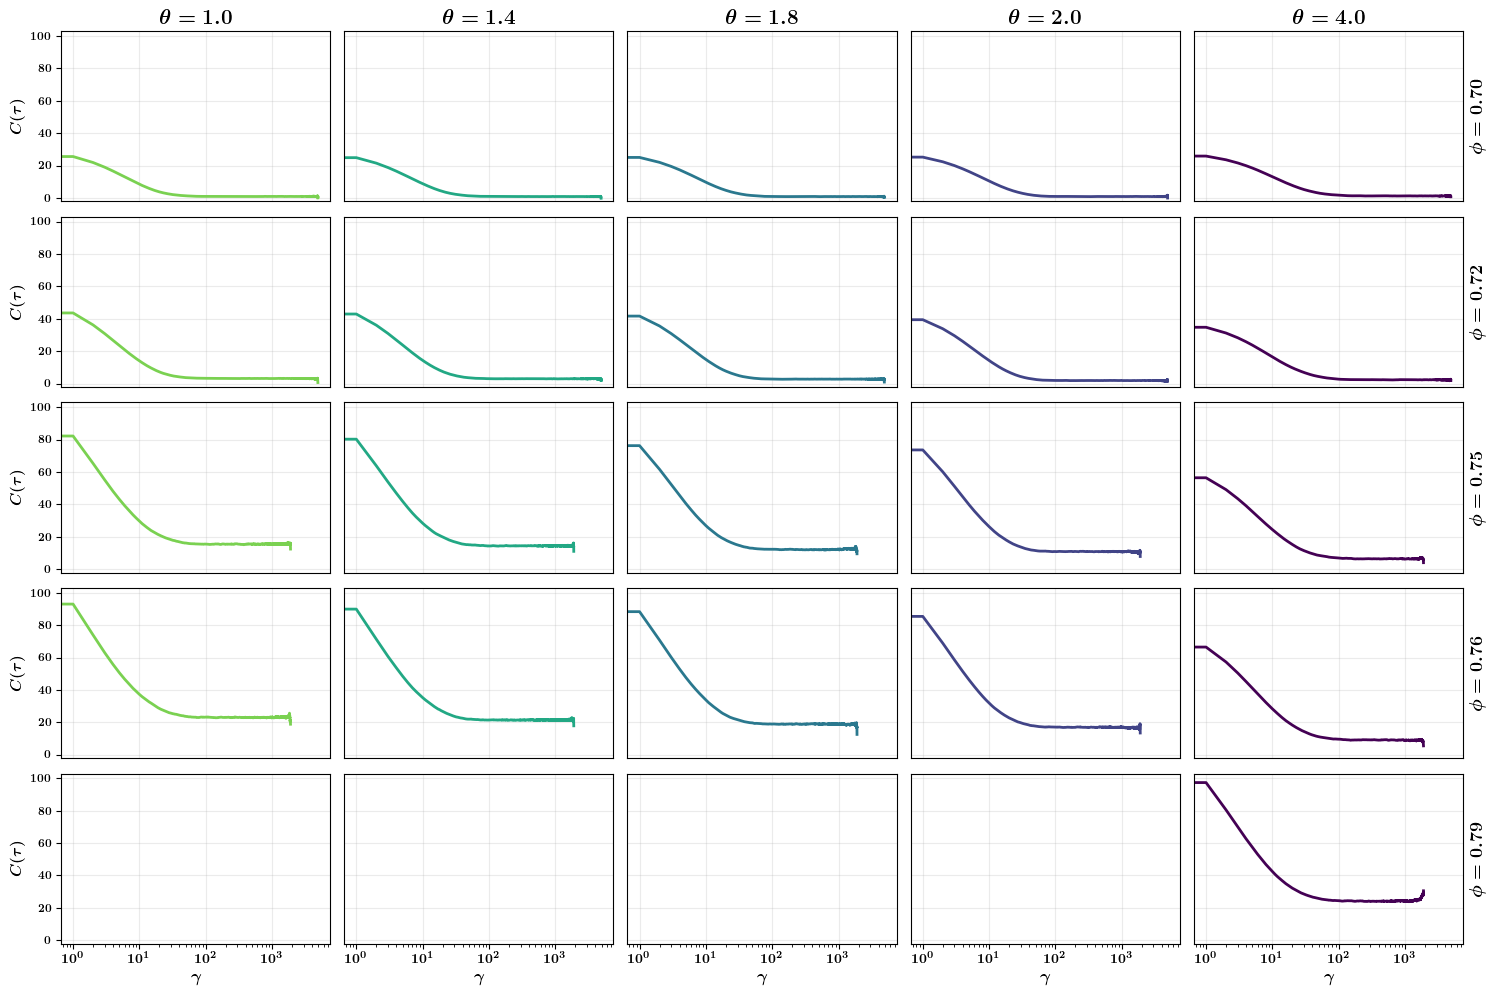

In [60]:
# rig perse 1

phi = [0.70, 0.72, 0.75, 0.76, 0.79]
ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r'] #color scheme
topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"

cmap         = matplotlib.colormaps['viridis_r'] 

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.8181942616808251]
off          = 100
line_markers = ['o', 's', '^', '*', 'p']

fig,axs = plt.subplots(len(phi), len(ar), figsize=(3*len(ar), 2*len(phi)))

for i, phii in enumerate(phi):
    #perse_ar = []
    for j, arj in enumerate(ar):
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        workdir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5'
        pers = [] 
        if os.path.exists(workdir):
            for l in range(4):
                rigFile = f'{workdir}/run_{l+1}/rigPers.txt'
                data    = np.genfromtxt(rigFile, delimiter='', dtype=float, skip_header=1)
                pers.append(data[:-5,1])
            persDat = np.mean(np.array(pers), axis=0)
        #perse_ar.append(persDat)
        else:
            persDat = np.nan
        axs[i,j].plot(persDat, linestyle='-',marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
                 color=cmap((j+1)/len(ar)),linewidth=2, markersize=0)
        
        axs[i,j].set_xscale('log')
        axs[i,j].grid('both', alpha = .25)
        axs[0,j].set_title(fr'$\theta = {arj}$', fontsize=15, pad=5)

        axs[i,-1].set_ylabel(fr'$\mathbf{{\phi = {phir}}}$', color="black", fontsize=13, labelpad=5)
        axs[i,-1].yaxis.set_label_position("right")
        axs[i,-1].yaxis.label.set_rotation(90)
        
        if j == 0:
            axs[i,j].set_ylabel(r'$C(\mathbf{\tau})$', fontsize=11)
            axs[i,j].tick_params(axis='y', labelsize=8)
        else:
            axs[i,j].tick_params(axis='y', which='both', left=False, labelleft=False)

        if phii == phi[-1]:
            axs[i,j].set_xlabel(r'$\gamma$', fontsize=12)
            axs[i,j].tick_params(axis='x', labelsize=10)
        else:
            axs[i,j].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

y_mins, y_maxs = zip(*[ax.get_ylim() for ax in axs.flatten()])
x_mins, x_maxs = zip(*[ax.get_xlim() for ax in axs.flatten()])

for ax in axs.flatten():
    ax.set_xlim(min(x_mins), max(x_maxs))
    ax.set_ylim(min(y_mins), max(y_maxs)*.65)

plt.tight_layout()
if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "rigperse_all" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

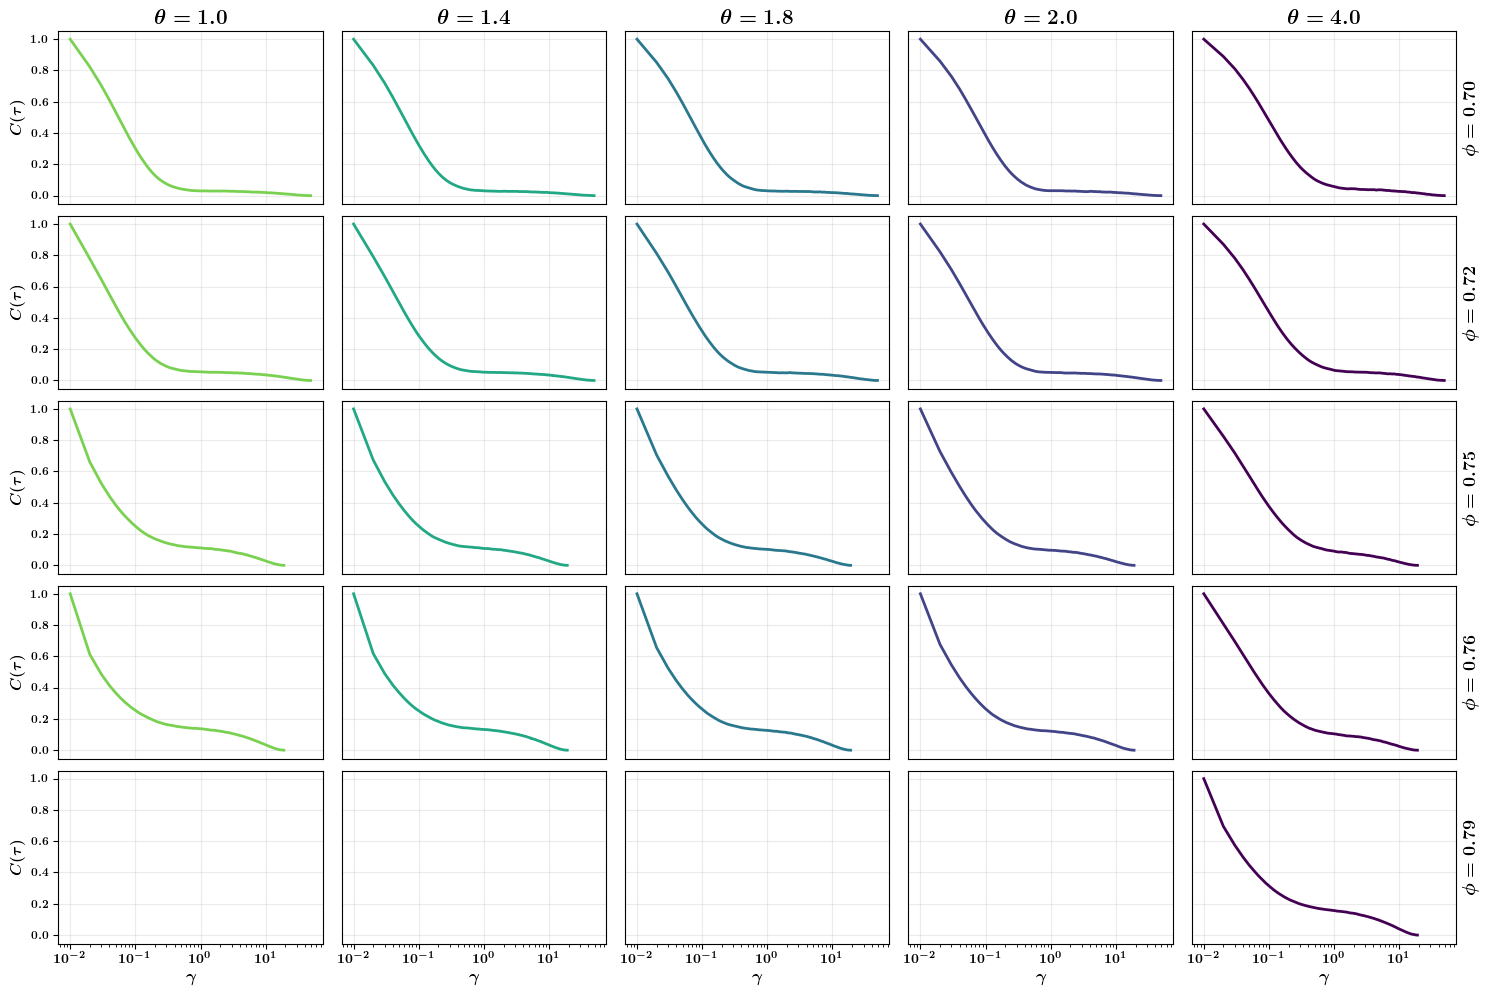

In [24]:
# rig perse 2

phi = [0.70, 0.72, 0.75, 0.76, 0.79]
ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r'] #color scheme
topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_persistence/"

cmap         = matplotlib.colormaps['viridis_r'] 

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.8181942616808251]
off          = 100
numruns      = 4
line_markers = ['o', 's', '^', '*', 'p']

fig,axs = plt.subplots(len(phi), len(ar), figsize=(3*len(ar), 2*len(phi)))

for i, phii in enumerate(phi):
    for j, arj in enumerate(ar):
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        workdir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5'
        pers = []
        taug = []
        if os.path.exists(workdir):
            for l in range(numruns):
                rigFile = f'{workdir}/run_{l+1}/rigPers.txt'
                data    = np.genfromtxt(rigFile, delimiter='', dtype=float, skip_header=1)
                pers.append(data[:,1])
                taug.append(data[:,0])
            persDat = np.mean(np.array(pers), axis=0)
            taugDat = np.mean(np.array(taug), axis=0)
        #perse_ar.append(persDat)
        else:
            persDat = np.nan
            taugDat = np.nan
        axs[i,j].plot(taugDat, persDat, linestyle='-',marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
                 color=cmap((j+1)/len(ar)),linewidth=2, markersize=0)
        
        axs[i,j].set_xscale('log')
        #axs[i,j].set_xscale('symlog', linthresh=1, base=10)
        axs[i,j].grid('both', alpha = .25)
        axs[0,j].set_title(fr'$\theta = {arj}$', fontsize=15, pad=5)

        axs[i,-1].set_ylabel(fr'$\mathbf{{\phi = {phir}}}$', color="black", fontsize=13, labelpad=5)
        axs[i,-1].yaxis.set_label_position("right")
        axs[i,-1].yaxis.label.set_rotation(90)
        
        if j == 0:
            axs[i,j].set_ylabel(r'$C(\mathbf{\tau})$', fontsize=11)
            axs[i,j].tick_params(axis='y', labelsize=8)
        else:
            axs[i,j].tick_params(axis='y', which='both', left=False, labelleft=False)

        if phii == phi[-1]:
            axs[i,j].set_xlabel(r'$\gamma$', fontsize=12)
            axs[i,j].tick_params(axis='x', labelsize=10)
            
            #xticks = axs[i, j].get_xticks()
            #axs[i, j].set_xticklabels([tick / 100 for tick in xticks])
        else:
            axs[i,j].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

y_mins, y_maxs = zip(*[ax.get_ylim() for ax in axs.flatten()])
x_mins, x_maxs = zip(*[ax.get_xlim() for ax in axs.flatten()])

for ax in axs.flatten():
    ax.set_xlim(min(x_mins), max(x_maxs))
    ax.set_ylim(min(y_mins), max(y_maxs))

plt.tight_layout()
if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "rigperse_all2" +figFormat, bbox_inches="tight",dpi=500)
plt.show()